## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import davies_bouldin_score

In [43]:
file=pd.read_csv('../data/quantile_normalized.csv')

In [44]:
X=file.drop(columns=["FIPS","State","County","q_countycode"],axis=1)

In [45]:
X.head()

,q_Years of Potential Life Lost Rate,q_% Fair or Poor Health,q_Average Number of Physically Unhealthy Days,q_Average Number of Mentally Unhealthy Days,q_% Low Birthweight,q_% Smokers,q_Food Environment Index,q_% Physically Inactive,q_% With Access to Exercise Opportunities,q_% Excessive Drinking,...,q_% Diagnosed Diabetes,q_% Nonwhite,q_% households wo car,q_Number of Hospitals,q_% disabled,q_% Without Health Insurance,q_% Limited English Proficiency,q_% workers commuting by public transit,q_% Veterans in Civilian Adult Population,q_opioid death rate
0,0.519452,0.745536,0.851403,0.788584,0.683992,0.606505,0.327009,0.897481,0.556441,0.228316,...,0.659120,0.747768,0.499043,0.414700,0.794324,0.457589,0.427615,0.271292,0.908801,0.129783
1,0.410077,0.525191,0.659439,0.588967,0.634566,0.554209,0.658482,0.441327,0.632653,0.548151,...,0.280931,0.598852,0.154974,0.877551,0.357781,0.677774,0.643176,0.271292,0.897003,0.072385
2,0.791454,0.981505,0.969707,0.956314,0.931441,0.894133,0.066805,0.247290,0.306760,0.068878,...,0.895408,0.947704,0.873724,0.414700,0.907685,0.694675,0.652423,0.485327,0.298788,0.421237
3,0.920281,0.654974,0.801658,0.734375,0.874043,0.699617,0.565370,0.861448,0.049426,0.275191,...,0.728476,0.749681,0.539222,0.414700,0.612085,0.499203,0.439732,0.641467,0.225287,0.464286
4,0.884566,0.798151,0.882653,0.889031,0.465561,0.707270,0.824936,0.706952,0.048788,0.164860,...,0.728476,0.219707,0.240115,0.414700,0.382812,0.729432,0.650510,0.271292,0.464764,0.122449


In [46]:
X.shape

(3136, 91)

### Column details

In [47]:
X.describe()

,q_Years of Potential Life Lost Rate,q_% Fair or Poor Health,q_Average Number of Physically Unhealthy Days,q_Average Number of Mentally Unhealthy Days,q_% Low Birthweight,q_% Smokers,q_Food Environment Index,q_% Physically Inactive,q_% With Access to Exercise Opportunities,q_% Excessive Drinking,...,q_% Diagnosed Diabetes,q_% Nonwhite,q_% households wo car,q_Number of Hospitals,q_% disabled,q_% Without Health Insurance,q_% Limited English Proficiency,q_% workers commuting by public transit,q_% Veterans in Civilian Adult Population,q_opioid death rate
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,...,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3135.000000,3136.000000,3136.000000
mean,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,...,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159
std,0.288610,0.288721,0.288721,0.288721,0.288716,0.288721,0.288559,0.288716,0.288720,0.288721,...,0.288707,0.288721,0.288721,0.273236,0.288713,0.288714,0.288618,0.286642,0.288721,0.288721
min,0.045918,0.000319,0.000319,0.000319,0.016263,0.000319,0.003348,0.000319,0.003348,0.000319,...,0.000319,0.000319,0.001435,0.093909,0.000319,0.000319,0.044802,0.106858,0.000319,0.000319
25%,0.250239,0.250239,0.250239,0.250239,0.250239,0.250239,0.242188,0.251754,0.250239,0.250239,...,0.245695,0.250239,0.250239,0.414700,0.253189,0.249522,0.250239,0.271292,0.250199,0.250239
50%,0.500159,0.500159,0.500159,0.500159,0.500159,0.500159,0.480548,0.496652,0.500159,0.500159,...,0.504943,0.500159,0.500159,0.414700,0.495855,0.499203,0.500159,0.485327,0.500478,0.500159
75%,0.750080,0.750080,0.750080,0.750080,0.750080,0.750080,0.748884,0.752232,0.750080,0.750080,...,0.750478,0.750080,0.750080,0.720344,0.747768,0.749243,0.750080,0.741308,0.750080,0.750080
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991071,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# Checking for presence of null values in any column

null_col=X.columns[X.isnull().any()].tolist()  
if len(null_col)>0:
    print(null_col)
else:
    print(" No null columns found")

['q_% workers commuting by public transit']


In [49]:
for val in null_col:
    print("The {} column has {} missing values".format(val,X[val].isnull().sum()))

The q_% workers commuting by public transit column has 1 missing values


In [50]:
X=X.dropna()

In [51]:
#listing all the columns with type str
for val in X.columns:
    if type(X[val][0])==str:
        print(val)

# Variance threshold to drop low variance data

In [ ]:
def Drop(l1, l2): 
    dif = [i for i in l1  if i not in l2] 
    return dif 

In [ ]:
"""feature_drop={}

for th in range(0,50,5):
    thresh = VarianceThreshold(threshold=th)
    thresh.fit(X)
    dropped_list=Drop(X.columns.tolist(),X.columns[thresh.get_support()].tolist())
    feature_drop[th]=(dropped_list,len(dropped_list))
    print("For threshold of {} the number of features dropped are {}".format(th,len(dropped_list)))
         """



### Since data is normalized so it does not contain lagre variance. SO variance threshold is not helpful

###  [       { " Threshold Value" :  (  [ 'Dropped features']  ,  'number of dropped features')  }  , ..........  ]

In [ ]:
feature_drop

In [ ]:
thresh.variances_

In [ ]:
thresh.get_support()

In [ ]:
thresh.variances_

# Correlation Matrix

In [52]:
X

,q_Years of Potential Life Lost Rate,q_% Fair or Poor Health,q_Average Number of Physically Unhealthy Days,q_Average Number of Mentally Unhealthy Days,q_% Low Birthweight,q_% Smokers,q_Food Environment Index,q_% Physically Inactive,q_% With Access to Exercise Opportunities,q_% Excessive Drinking,...,q_% Diagnosed Diabetes,q_% Nonwhite,q_% households wo car,q_Number of Hospitals,q_% disabled,q_% Without Health Insurance,q_% Limited English Proficiency,q_% workers commuting by public transit,q_% Veterans in Civilian Adult Population,q_opioid death rate
0,0.519452,0.745536,0.851403,0.788584,0.683992,0.606505,0.327009,0.897481,0.556441,0.228316,...,0.659120,0.747768,0.499043,0.414700,0.794324,0.457589,0.427615,0.271292,0.908801,0.129783
1,0.410077,0.525191,0.659439,0.588967,0.634566,0.554209,0.658482,0.441327,0.632653,0.548151,...,0.280931,0.598852,0.154974,0.877551,0.357781,0.677774,0.643176,0.271292,0.897003,0.072385
2,0.791454,0.981505,0.969707,0.956314,0.931441,0.894133,0.066805,0.247290,0.306760,0.068878,...,0.895408,0.947704,0.873724,0.414700,0.907685,0.694675,0.652423,0.485327,0.298788,0.421237
3,0.920281,0.654974,0.801658,0.734375,0.874043,0.699617,0.565370,0.861448,0.049426,0.275191,...,0.728476,0.749681,0.539222,0.414700,0.612085,0.499203,0.439732,0.641467,0.225287,0.464286
4,0.884566,0.798151,0.882653,0.889031,0.465561,0.707270,0.824936,0.706952,0.048788,0.164860,...,0.728476,0.219707,0.240115,0.414700,0.382812,0.729432,0.650510,0.271292,0.464764,0.122449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0.482462,0.296237,0.218112,0.196747,0.825893,0.605548,0.522640,0.333705,0.881059,0.955676,...,0.257812,0.365434,0.052934,0.720344,0.208227,0.555804,0.789222,0.936045,0.404496,0.207270
3132,0.091837,0.060587,0.075574,0.053571,0.497449,0.202168,0.748884,0.002232,0.978635,0.990115,...,0.000319,0.481505,0.055804,0.414700,0.006696,0.688935,0.911990,0.965391,0.061224,0.451531
3133,0.406888,0.355548,0.325893,0.217156,0.860013,0.529337,0.400032,0.496652,0.810268,0.683992,...,0.448661,0.346939,0.208865,0.720344,0.652583,0.580357,0.331952,0.958054,0.341518,0.506537
3134,0.293048,0.393495,0.317283,0.222895,0.331633,0.492028,0.787468,0.573501,0.797513,0.379464,...,0.280931,0.498724,0.367985,0.414700,0.449777,0.762277,0.616390,0.106858,0.899554,0.827806


In [53]:
Correlation_Matrix=X.corr().abs()
Correlation_Matrix

,q_Years of Potential Life Lost Rate,q_% Fair or Poor Health,q_Average Number of Physically Unhealthy Days,q_Average Number of Mentally Unhealthy Days,q_% Low Birthweight,q_% Smokers,q_Food Environment Index,q_% Physically Inactive,q_% With Access to Exercise Opportunities,q_% Excessive Drinking,...,q_% Diagnosed Diabetes,q_% Nonwhite,q_% households wo car,q_Number of Hospitals,q_% disabled,q_% Without Health Insurance,q_% Limited English Proficiency,q_% workers commuting by public transit,q_% Veterans in Civilian Adult Population,q_opioid death rate
q_Years of Potential Life Lost Rate,1.000000,0.700893,0.711581,0.696520,0.589446,0.710942,0.441181,0.534431,0.284746,0.558952,...,0.554978,0.281235,0.422232,0.023009,0.562436,0.262342,0.198645,0.117818,0.005836,0.032074
q_% Fair or Poor Health,0.700893,1.000000,0.901242,0.807294,0.598278,0.741738,0.571225,0.560518,0.340825,0.669923,...,0.563284,0.389745,0.453977,0.087594,0.546103,0.479385,0.010931,0.179398,0.196610,0.002009
q_Average Number of Physically Unhealthy Days,0.711581,0.901242,1.000000,0.938446,0.547479,0.807141,0.546167,0.490378,0.298672,0.627109,...,0.522719,0.245752,0.464101,0.070302,0.616691,0.306017,0.126591,0.140122,0.085083,0.033490
q_Average Number of Mentally Unhealthy Days,0.696520,0.807294,0.938446,1.000000,0.530720,0.791403,0.471002,0.467094,0.257554,0.586518,...,0.505618,0.182881,0.459967,0.025385,0.608335,0.173716,0.176566,0.098564,0.053991,0.087758
q_% Low Birthweight,0.589446,0.598278,0.547479,0.530720,1.000000,0.489821,0.371704,0.364558,0.130560,0.493273,...,0.453450,0.434212,0.393626,0.070768,0.359843,0.242648,0.045688,0.002651,0.143503,0.101608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q_% Without Health Insurance,0.262342,0.479385,0.306017,0.173716,0.242648,0.153867,0.413632,0.281646,0.302592,0.454763,...,0.207193,0.328377,0.038064,0.160220,0.228119,1.000000,0.233107,0.258390,0.039415,0.119770
q_% Limited English Proficiency,0.198645,0.010931,0.126591,0.176566,0.045688,0.313659,0.071723,0.251366,0.310337,0.136186,...,0.122203,0.366911,0.010577,0.340146,0.345019,0.233107,1.000000,0.240857,0.254897,0.271478
q_% workers commuting by public transit,0.117818,0.179398,0.140122,0.098564,0.002651,0.142864,0.137464,0.313914,0.416947,0.250475,...,0.114299,0.243426,0.201237,0.388643,0.299464,0.258390,0.240857,1.000000,0.112112,0.298923
q_% Veterans in Civilian Adult Population,0.005836,0.196610,0.085083,0.053991,0.143503,0.046076,0.027260,0.008559,0.045616,0.019477,...,0.075300,0.242125,0.192700,0.124097,0.274990,0.039415,0.254897,0.112112,1.000000,0.066305


## Simulating feature drop based on correlation matrix

In [54]:
# Select upper triangle of correlation matrix

feat_drop_corr=[]

for i in range(50,100,5):
    d={}
    coff=(i/100)
    upper = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than some value
    to_drop = [column for column in upper.columns if any(upper[column] > coff)]

    # Drop features 
    X_new=X.drop(to_drop, axis=1, inplace=False)
    d[coff]=X_new.shape[-1] , to_drop
    feat_drop_corr.append(d)

In [55]:
feat_drop_corr

[{0.5: (25,
   ['q_% Fair or Poor Health',
    'q_Average Number of Physically Unhealthy Days',
    'q_Average Number of Mentally Unhealthy Days',
    'q_% Low Birthweight',
    'q_% Smokers',
    'q_Food Environment Index',
    'q_% Physically Inactive',
    'q_% Excessive Drinking',
    'q_Teen Birth Rate',
    'q_Primary Care Physicians Rate',
    'q_Dentist Rate',
    'q_% Some College',
    'q_% Unemployed',
    'q_% Children in Poverty',
    'q_Income Ratio',
    'q_% Single-Parent Households',
    'q_Injury Death Rate',
    'q_% Drive Alone to Work',
    'q_Life Expectancy',
    'q_Age-Adjusted Death Rate',
    'q_Infant Mortality Rate',
    'q_% Frequent Mental Distress',
    'q_HIV Prevalence Rate',
    'q_% Food Insecure',
    'q_% Limited Access to Healthy Foods',
    'q_Drug Overdose Mortality Rate',
    'q_Motor Vehicle Mortality Rate',
    'q_% Insufficient Sleep',
    'q_% Disconnected Youth',
    'q_Average Math Performance',
    'q_Median Household Income',
    'q_% En

###  [       { " Threshold Value" : 'number of remaining features' (  [ 'Dropped features']  ,)  }  , ..........  ]

In [56]:
X_new

,q_Years of Potential Life Lost Rate,q_% Fair or Poor Health,q_Average Number of Physically Unhealthy Days,q_Average Number of Mentally Unhealthy Days,q_% Low Birthweight,q_% Smokers,q_Food Environment Index,q_% Physically Inactive,q_% With Access to Exercise Opportunities,q_% Excessive Drinking,...,q_% Diagnosed Diabetes,q_% Nonwhite,q_% households wo car,q_Number of Hospitals,q_% disabled,q_% Without Health Insurance,q_% Limited English Proficiency,q_% workers commuting by public transit,q_% Veterans in Civilian Adult Population,q_opioid death rate
0,0.519452,0.745536,0.851403,0.788584,0.683992,0.606505,0.327009,0.897481,0.556441,0.228316,...,0.659120,0.747768,0.499043,0.414700,0.794324,0.457589,0.427615,0.271292,0.908801,0.129783
1,0.410077,0.525191,0.659439,0.588967,0.634566,0.554209,0.658482,0.441327,0.632653,0.548151,...,0.280931,0.598852,0.154974,0.877551,0.357781,0.677774,0.643176,0.271292,0.897003,0.072385
2,0.791454,0.981505,0.969707,0.956314,0.931441,0.894133,0.066805,0.247290,0.306760,0.068878,...,0.895408,0.947704,0.873724,0.414700,0.907685,0.694675,0.652423,0.485327,0.298788,0.421237
3,0.920281,0.654974,0.801658,0.734375,0.874043,0.699617,0.565370,0.861448,0.049426,0.275191,...,0.728476,0.749681,0.539222,0.414700,0.612085,0.499203,0.439732,0.641467,0.225287,0.464286
4,0.884566,0.798151,0.882653,0.889031,0.465561,0.707270,0.824936,0.706952,0.048788,0.164860,...,0.728476,0.219707,0.240115,0.414700,0.382812,0.729432,0.650510,0.271292,0.464764,0.122449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0.482462,0.296237,0.218112,0.196747,0.825893,0.605548,0.522640,0.333705,0.881059,0.955676,...,0.257812,0.365434,0.052934,0.720344,0.208227,0.555804,0.789222,0.936045,0.404496,0.207270
3132,0.091837,0.060587,0.075574,0.053571,0.497449,0.202168,0.748884,0.002232,0.978635,0.990115,...,0.000319,0.481505,0.055804,0.414700,0.006696,0.688935,0.911990,0.965391,0.061224,0.451531
3133,0.406888,0.355548,0.325893,0.217156,0.860013,0.529337,0.400032,0.496652,0.810268,0.683992,...,0.448661,0.346939,0.208865,0.720344,0.652583,0.580357,0.331952,0.958054,0.341518,0.506537
3134,0.293048,0.393495,0.317283,0.222895,0.331633,0.492028,0.787468,0.573501,0.797513,0.379464,...,0.280931,0.498724,0.367985,0.414700,0.449777,0.762277,0.616390,0.106858,0.899554,0.827806


In [57]:
# for correlation 0.5

X_red=X.drop(feat_drop_corr[0][0.5][-1],axis=1)
X_red

,q_Years of Potential Life Lost Rate,q_% With Access to Exercise Opportunities,q_% Driving Deaths with Alcohol Involvement,q_Chlamydia Rate,q_% With Annual Mammogram,q_% Vaccinated,q_High School Graduation Rate,q_Social Association Rate,q_Violent Crime Rate,q_Average Daily PM2.5,...,q_Other Primary Care Provider Ratio,q_Average Reading Performance,q_Suicide Rate (Age-Adjusted),q_Juvenile Arrest Rate,q_% less than 18 years of age,q_% Native Hawaiian/Other Pacific Islander,q_% Female,q_Hypertension Death Rate,q_% workers commuting by public transit,q_% Veterans in Civilian Adult Population
0,0.519452,0.556441,0.484853,0.666454,0.516263,0.420918,0.521205,0.576212,0.671237,0.950096,...,0.580995,0.489158,0.678571,0.440689,0.724490,0.729911,0.848852,0.239796,0.271292,0.908801
1,0.410077,0.632653,0.623246,0.516582,0.618304,0.533323,0.324936,0.420281,0.528061,0.732462,...,0.414222,0.541454,0.740753,0.721939,0.436224,0.536033,0.863202,0.108099,0.271292,0.897003
2,0.791454,0.306760,0.838807,0.900829,0.711735,0.283482,0.154815,0.204401,0.845026,0.926180,...,0.457749,0.274235,0.387755,0.520089,0.337691,0.855867,0.078125,0.420918,0.485327,0.298788
3,0.920281,0.049426,0.507972,0.545281,0.460459,0.314094,0.221779,0.263393,0.209184,0.883929,...,0.938616,0.264668,0.798788,0.173469,0.298788,0.743622,0.066645,0.107781,0.641467,0.225287
4,0.884566,0.048788,0.254783,0.305166,0.192761,0.346779,0.739477,0.269452,0.900191,0.950096,...,0.708227,0.562819,0.614477,0.385523,0.658482,0.756059,0.659758,0.037309,0.271292,0.464764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0.482462,0.881059,0.723214,0.285714,0.315370,0.420918,0.134088,0.431122,0.715242,0.045759,...,0.296397,0.720026,0.839923,0.535077,0.915816,0.820153,0.145089,0.549904,0.936045,0.404496
3132,0.091837,0.978635,0.333227,0.560906,0.569196,0.837851,0.393335,0.838967,0.036193,0.036193,...,0.956792,0.806122,0.354592,0.356824,0.120217,0.813457,0.132334,0.003348,0.965391,0.061224
3133,0.406888,0.810268,0.272800,0.124522,0.105708,0.205835,0.257653,0.049745,0.167092,0.096142,...,0.330676,0.879464,0.838648,0.392538,0.966837,0.807079,0.236288,0.286990,0.958054,0.341518
3134,0.293048,0.797513,0.272800,0.274713,0.086735,0.457589,0.252232,0.832270,0.183355,0.032047,...,0.477519,0.972258,0.121014,0.520089,0.596620,0.697704,0.252232,0.499522,0.106858,0.899554


In [58]:
X_red_corr=X_red.corr()
X_red_corr

,q_Years of Potential Life Lost Rate,q_% With Access to Exercise Opportunities,q_% Driving Deaths with Alcohol Involvement,q_Chlamydia Rate,q_% With Annual Mammogram,q_% Vaccinated,q_High School Graduation Rate,q_Social Association Rate,q_Violent Crime Rate,q_Average Daily PM2.5,...,q_Other Primary Care Provider Ratio,q_Average Reading Performance,q_Suicide Rate (Age-Adjusted),q_Juvenile Arrest Rate,q_% less than 18 years of age,q_% Native Hawaiian/Other Pacific Islander,q_% Female,q_Hypertension Death Rate,q_% workers commuting by public transit,q_% Veterans in Civilian Adult Population
q_Years of Potential Life Lost Rate,1.000000,-0.284746,-0.009084,0.362688,-0.337854,-0.165640,-0.096811,-0.051618,0.284472,0.352095,...,-0.023011,-0.096911,0.342488,-0.024678,0.046360,-0.079192,0.245345,0.340907,-0.117818,-0.005836
q_% With Access to Exercise Opportunities,-0.284746,1.000000,0.060762,0.149765,0.212607,0.321757,-0.134427,-0.022210,0.183778,-0.068615,...,0.037516,0.053511,0.086742,0.262052,-0.061686,0.282429,0.103737,-0.208471,0.416947,-0.045616
q_% Driving Deaths with Alcohol Involvement,-0.009084,0.060762,1.000000,0.039006,0.079282,0.010633,-0.073246,-0.023786,0.040957,-0.075293,...,-0.016837,-0.009164,0.062091,0.020767,-0.075441,0.033172,-0.041341,-0.030654,0.091211,0.105822
q_Chlamydia Rate,0.362688,0.149765,0.039006,1.000000,-0.066018,0.135733,-0.324947,-0.114145,0.483497,0.283175,...,-0.012009,-0.153841,0.090588,0.134524,0.181141,0.269382,0.330525,0.221937,0.239599,-0.245258
q_% With Annual Mammogram,-0.337854,0.212607,0.079282,-0.066018,1.000000,0.475326,0.040901,0.279576,-0.077624,0.009588,...,0.027734,0.221902,-0.102530,0.117406,-0.169463,-0.078726,0.102403,-0.211661,0.142493,0.080716
q_% Vaccinated,-0.165640,0.321757,0.010633,0.135733,0.475326,1.000000,0.045866,0.074321,0.058916,0.237672,...,-0.023042,0.213032,0.099504,0.170258,-0.046047,0.092045,0.249473,-0.106598,0.259042,-0.084035
q_High School Graduation Rate,-0.096811,-0.134427,-0.073246,-0.324947,0.040901,0.045866,1.000000,0.104303,-0.218021,0.140370,...,-0.037250,0.230280,-0.090069,-0.106403,0.010278,-0.185912,-0.035602,-0.029828,-0.194657,0.027874
q_Social Association Rate,-0.051618,-0.022210,-0.023786,-0.114145,0.279576,0.074321,0.104303,1.000000,-0.106247,-0.024697,...,0.051582,0.163898,-0.089301,0.136971,-0.042533,-0.191487,0.064559,0.014912,-0.108288,0.102491
q_Violent Crime Rate,0.284472,0.183778,0.040957,0.483497,-0.077624,0.058916,-0.218021,-0.106247,1.000000,0.183716,...,-0.020246,-0.190237,0.194741,0.133999,0.039833,0.253305,0.227135,0.105123,0.186413,-0.025476
q_Average Daily PM2.5,0.352095,-0.068615,-0.075293,0.283175,0.009588,0.237672,0.140370,-0.024697,0.183716,1.000000,...,-0.093742,0.154684,0.078333,-0.041997,0.078504,-0.033989,0.359161,0.162060,0.024727,-0.143868


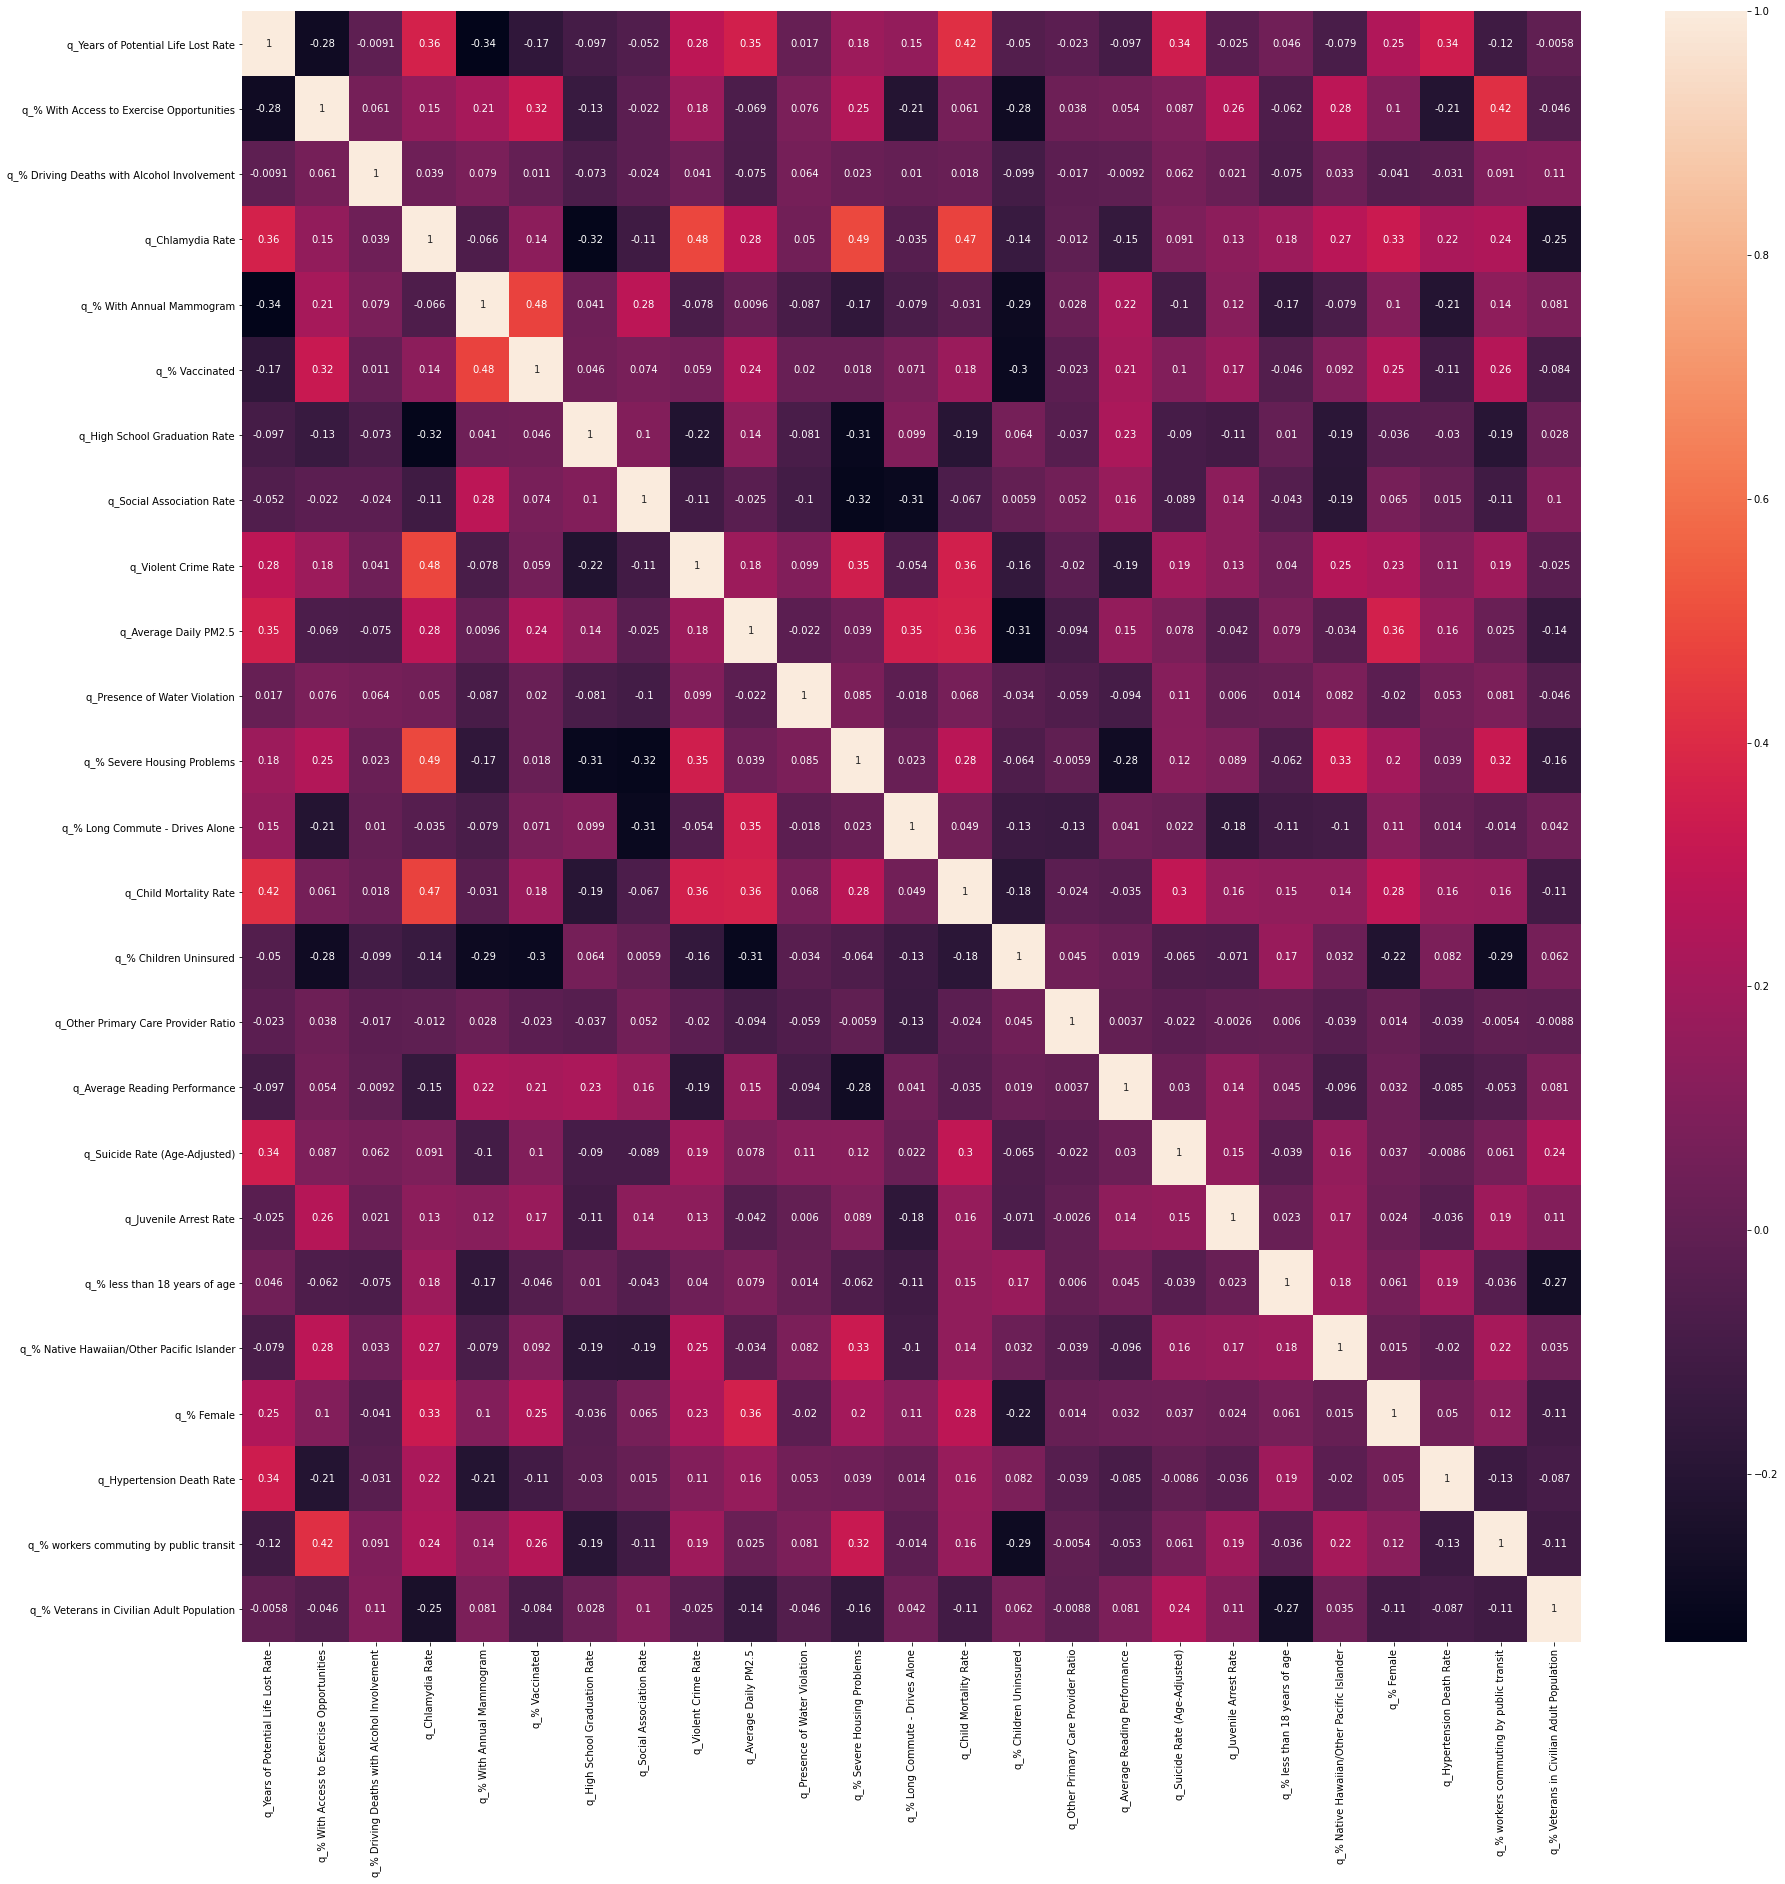

In [59]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=[30,30])
sn.heatmap(X_red_corr, annot=True)
# plt.savefig('heatmap.png')
plt.show()

# Kmeans

In [88]:
model=  KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(X_red)
label=pd.DataFrame(model.labels_)
file['class']=label
file.dropna(inplace=True)
print(file['class'].value_counts())
file.to_csv('../data/Clustering labelled data_q_normalized/2_cluster.csv')

1.0    962
2.0    809
0.0    767
3.0    595
Name: class, dtype: int64


In [89]:
(model.cluster_centers_)

array([[0.40074542, 0.76940524, 0.54687583, 0.63979916, 0.59577329,
        0.646638  , 0.36462901, 0.43829283, 0.63057454, 0.47565777,
        0.54017234, 0.6939199 , 0.44745371, 0.5651079 , 0.3708959 ,
        0.52543588, 0.46277997, 0.54027241, 0.64080022, 0.44887268,
        0.66426989, 0.56892758, 0.40487401, 0.73157916, 0.48292157,
        0.94010417],
       [0.50732408, 0.47282388, 0.4900744 , 0.3788565 , 0.55662841,
        0.56201092, 0.61834264, 0.53351178, 0.3908058 , 0.57440675,
        0.49887664, 0.38527842, 0.59776014, 0.44889548, 0.43744768,
        0.48427252, 0.61457621, 0.56358197, 0.49759501, 0.43658526,
        0.40295129, 0.46852367, 0.47120979, 0.46545153, 0.55333484,
        0.00519211],
       [0.74841468, 0.36500522, 0.47925345, 0.68282267, 0.38936407,
        0.45965903, 0.45152076, 0.46212156, 0.63963526, 0.65829846,
        0.4987235 , 0.58239319, 0.56430389, 0.70119183, 0.49486406,
        0.44539232, 0.42823403, 0.57497249, 0.45118434, 0.58612098,
      

In [90]:
label=pd.DataFrame(model.labels_)

In [91]:
label

,0
0,2
1,0
2,2
3,2
4,2
...,...
3129,3
3130,3
3131,3
3132,3


In [92]:
X_red.shape

(3134, 26)

## Using predicted labels as class column for supervised feature importance score and cluster analysis

In [93]:
X_red['class']=label

In [94]:
X_red.dropna(inplace=True)

In [95]:
X_red['class'].unique()

array([2., 0., 1., 3.])

In [96]:
X1.columns

Index(['q_Years of Potential Life Lost Rate',
       'q_% With Access to Exercise Opportunities',
       'q_% Driving Deaths with Alcohol Involvement', 'q_Chlamydia Rate',
       'q_% With Annual Mammogram', 'q_% Vaccinated',
       'q_High School Graduation Rate', 'q_Social Association Rate',
       'q_Violent Crime Rate', 'q_Average Daily PM2.5',
       'q_Presence of Water Violation', 'q_% Severe Housing Problems',
       'q_% Long Commute - Drives Alone', 'q_Child Mortality Rate',
       'q_% Children Uninsured', 'q_Other Primary Care Provider Ratio',
       'q_Average Reading Performance', 'q_Suicide Rate (Age-Adjusted)',
       'q_Juvenile Arrest Rate', 'q_% less than 18 years of age',
       'q_% Native Hawaiian/Other Pacific Islander', 'q_% Female',
       'q_Hypertension Death Rate', 'q_% workers commuting by public transit',
       'q_% Veterans in Civilian Adult Population'],
      dtype='object')

In [97]:
X1=X_red.drop(['class'],axis=1)

In [98]:
y1=X_red['class']

In [99]:
y1.isnull().sum()

0

### To install required package if missing

In [100]:
# !pip install xgboost

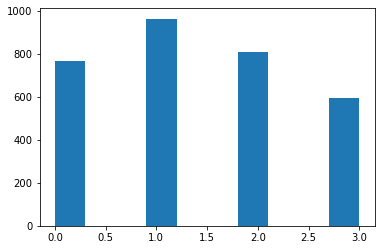

In [101]:
#class distribution
y1.hist(grid=False)

In [102]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X1, y1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
print(model.feature_importances_)


[0.08584166 0.06771182 0.02121348 0.06603926 0.03072407 0.02668357
 0.03261235 0.02408558 0.03159783 0.05997002 0.02893061 0.0369589
 0.03223649 0.03948394 0.06007816 0.02257351 0.03269718 0.08332501
 0.03544858 0.02852638 0.03381094 0.02676097 0.02791939 0.0414348
 0.02333556]


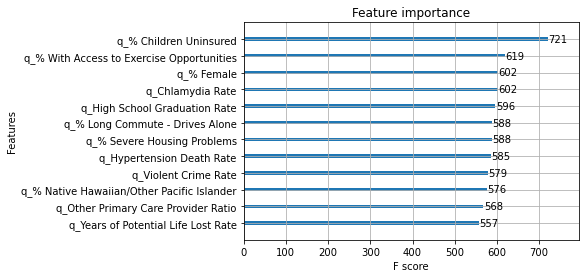

In [104]:
from xgboost import plot_importance
from matplotlib import pyplot

# No of top important features to show type=integer
top_n_features=12

plot_importance(model,max_num_features=top_n_features)
pyplot.show()

In [105]:
from sklearn.metrics import classification_report as clf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
test_model=ExtraTreesClassifier()

In [107]:
test_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [108]:
y_pred = test_model.predict(X_test)
print(clf(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       273
         1.0       0.74      0.75      0.75       325
         2.0       0.69      0.75      0.72       249
         3.0       0.73      0.71      0.72       187

    accuracy                           0.74      1034
   macro avg       0.74      0.73      0.74      1034
weighted avg       0.74      0.74      0.74      1034



# Cluster Distribution as per death column and some others

## Scatter Plot

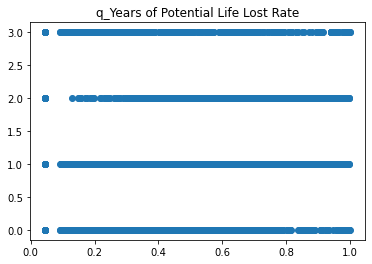

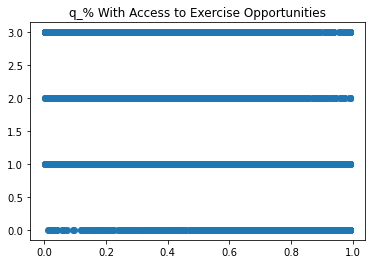

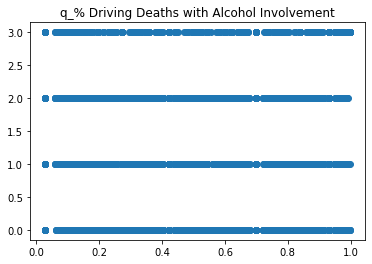

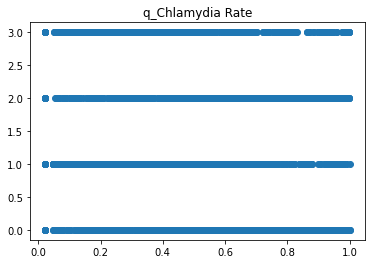

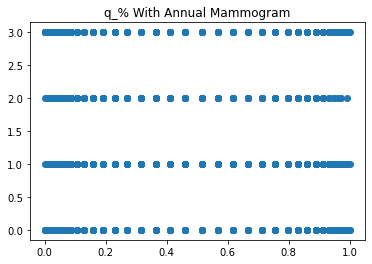

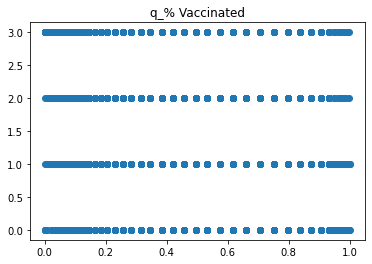

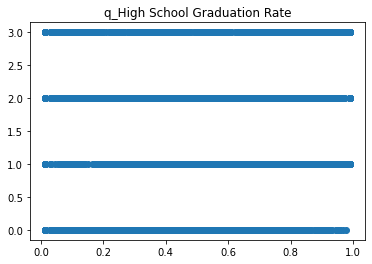

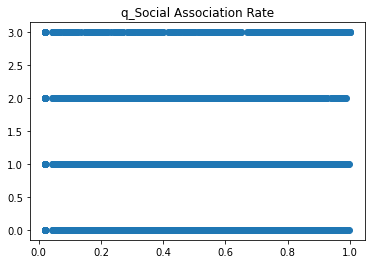

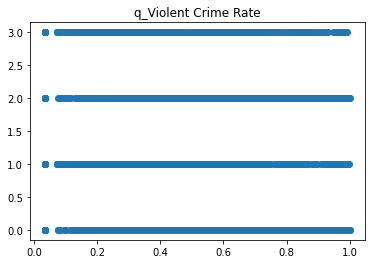

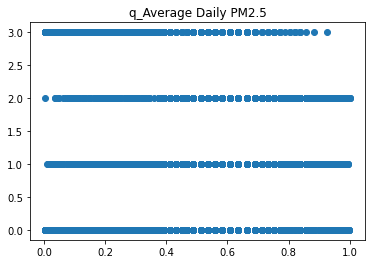

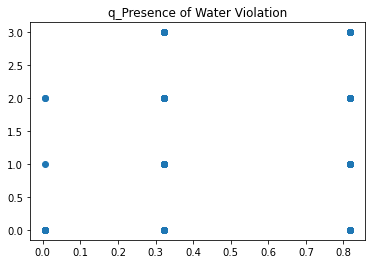

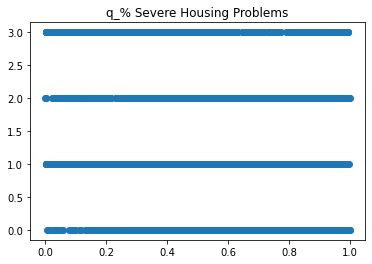

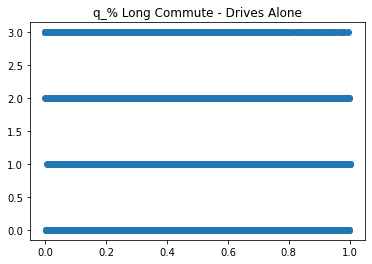

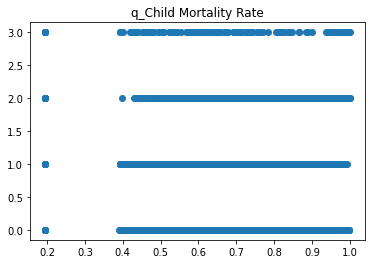

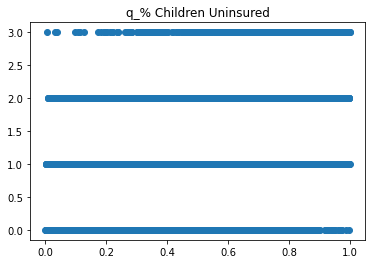

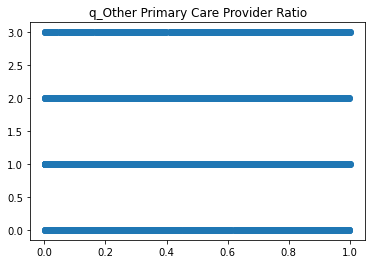

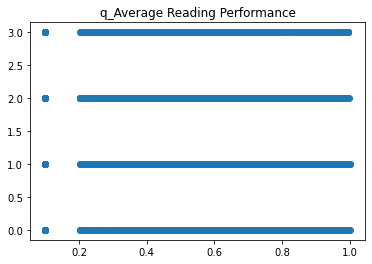

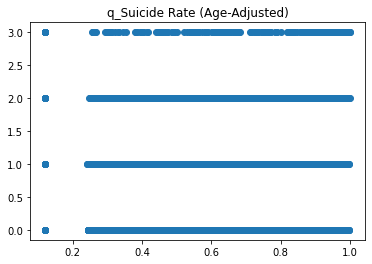

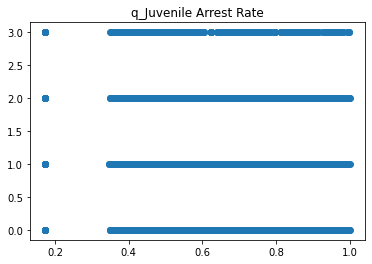

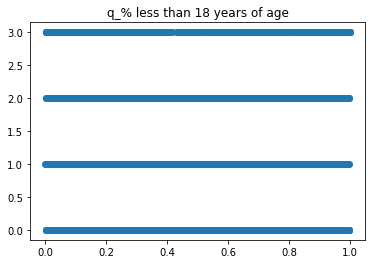

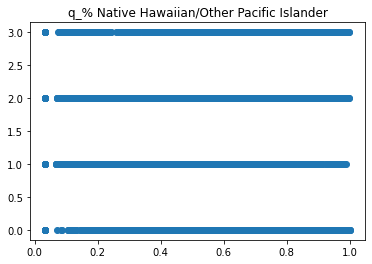

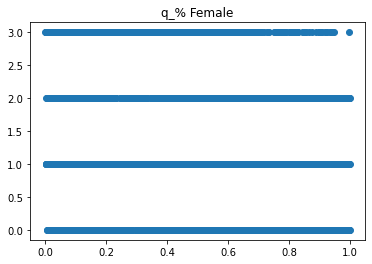

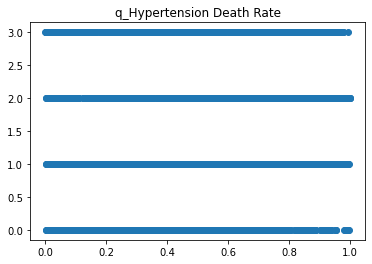

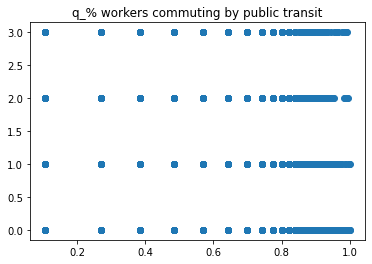

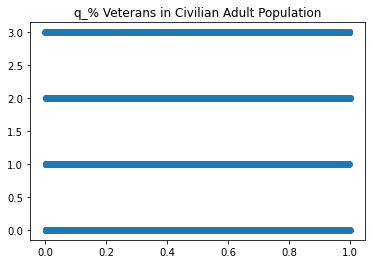

In [110]:
# to supress warnings
import warnings
warnings.simplefilter(action='ignore')

for i in X1.columns:
    plt.figure(frameon=True,)
    plt.scatter(X1[i],y1)
    plt.title(i)
#     plt.savefig(str(i)+".png")

## Violet plot

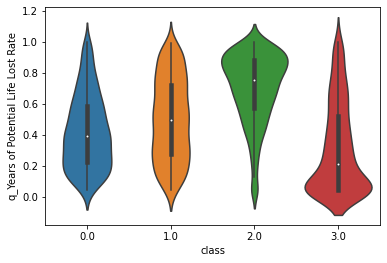

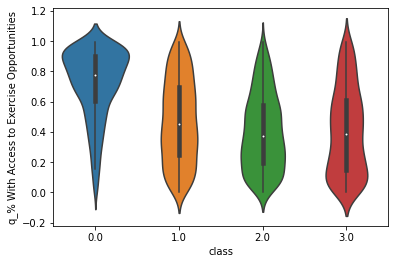

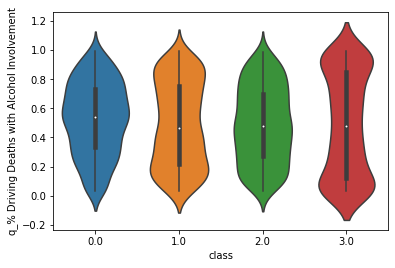

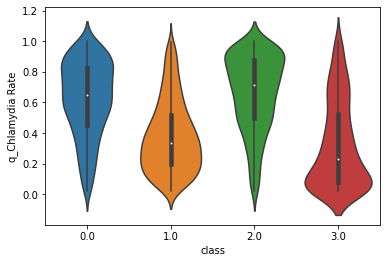

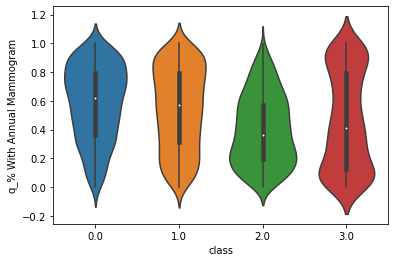

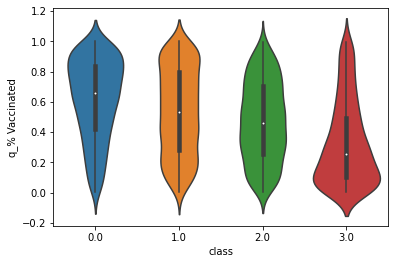

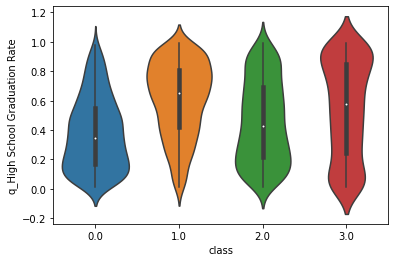

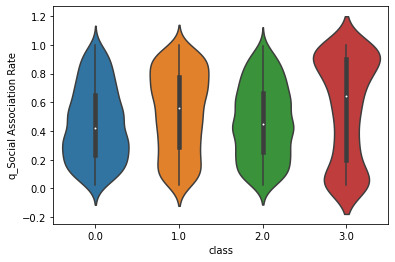

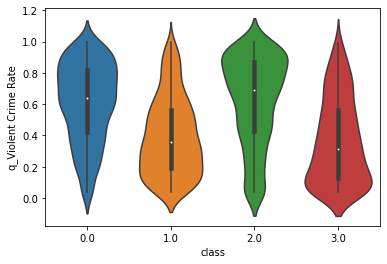

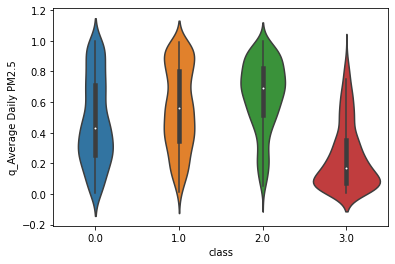

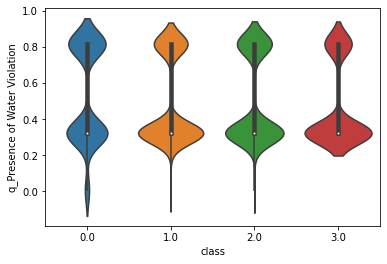

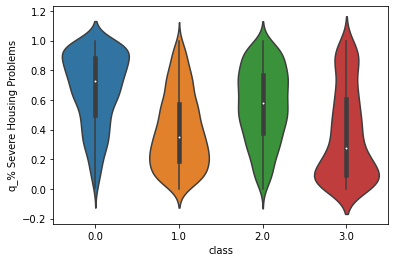

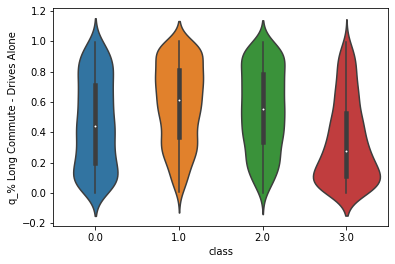

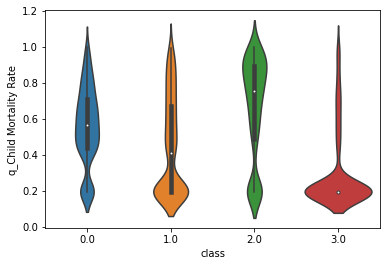

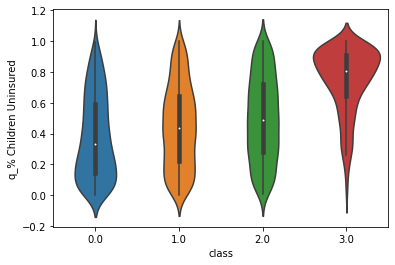

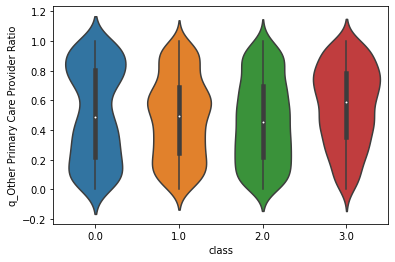

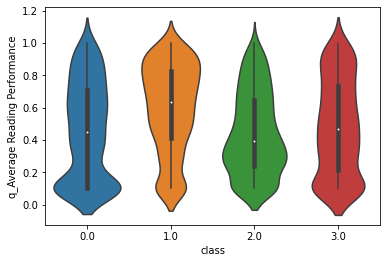

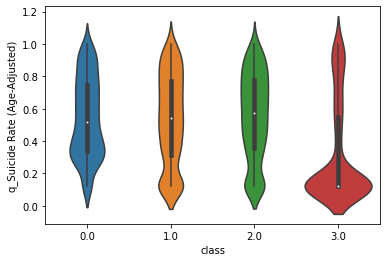

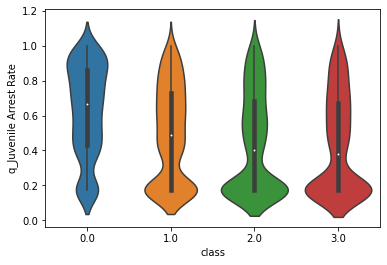

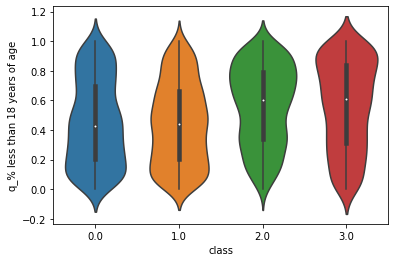

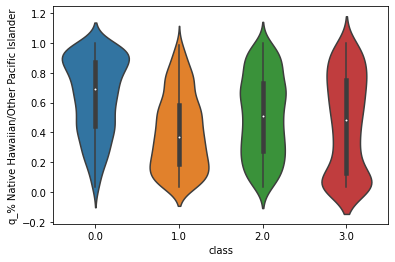

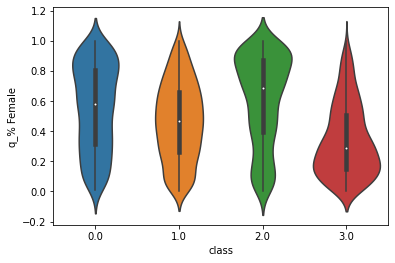

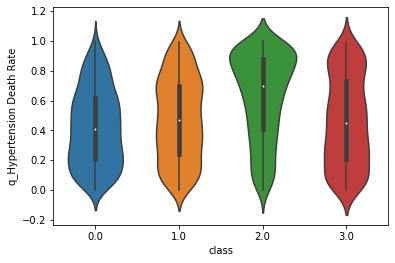

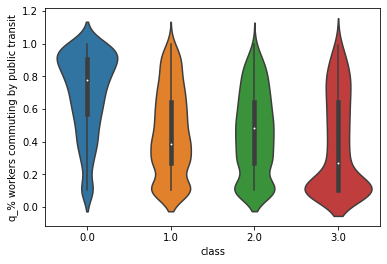

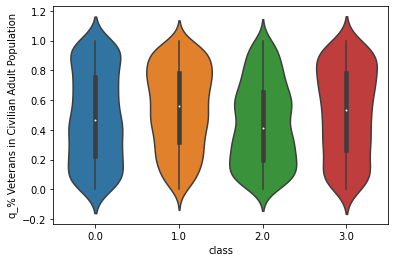

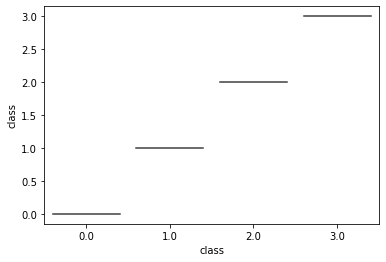

In [112]:
import seaborn as sns


for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x='class',y=X_red[i],data=X_red)
#     plt.savefig(str(i)+".png")

## Box Plot

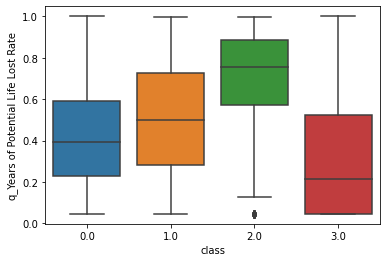

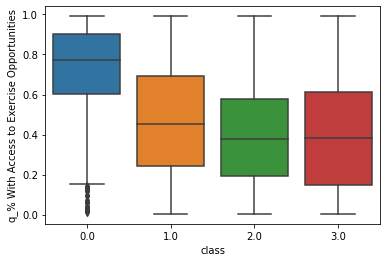

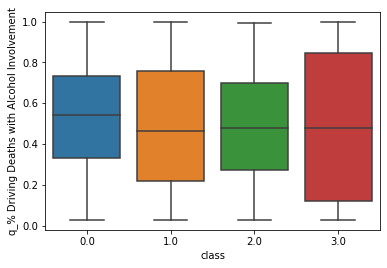

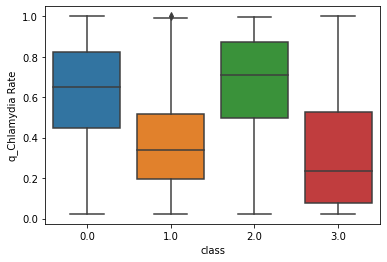

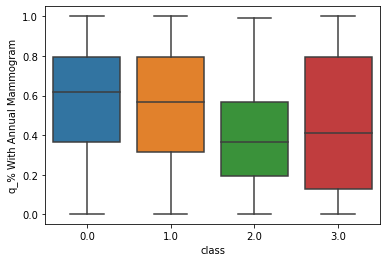

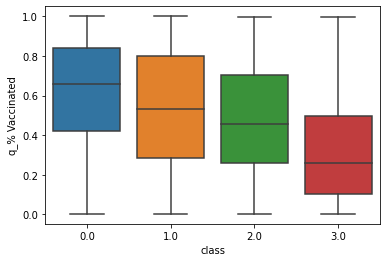

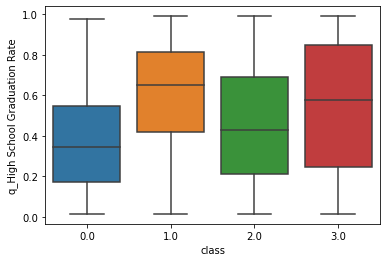

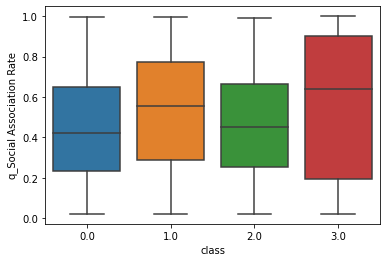

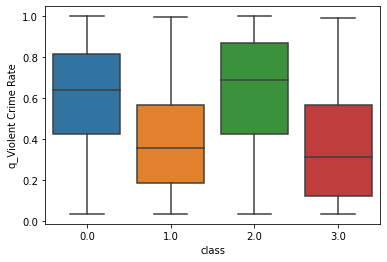

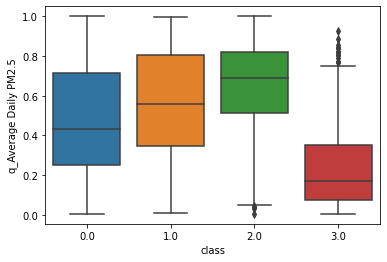

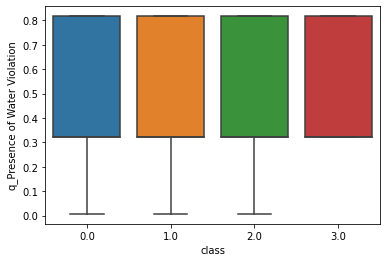

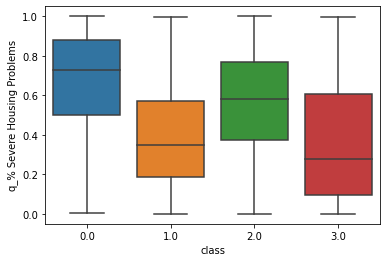

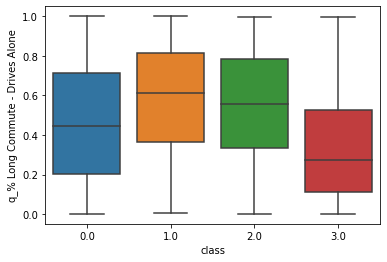

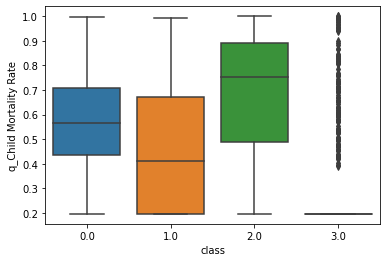

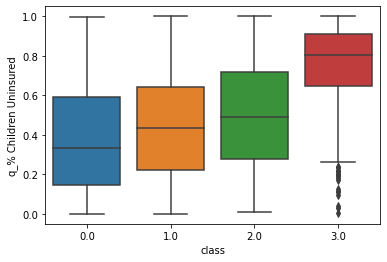

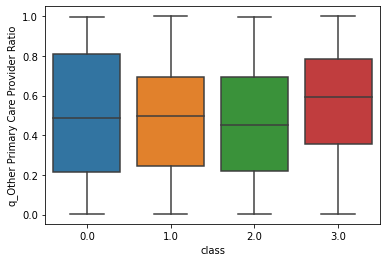

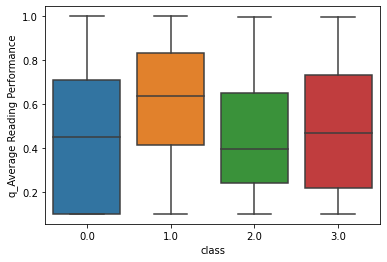

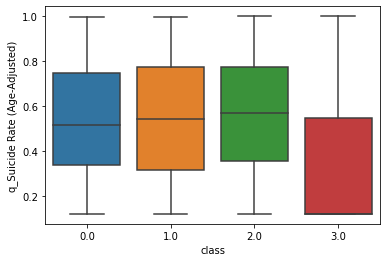

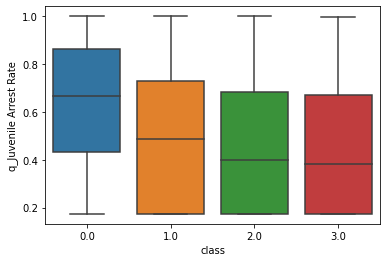

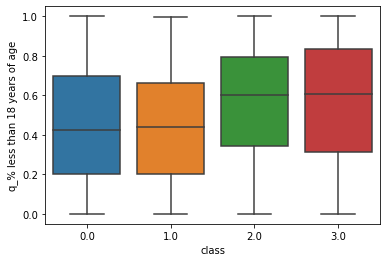

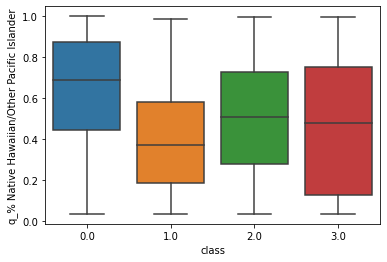

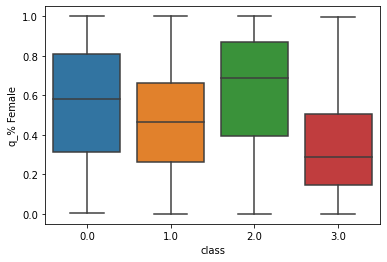

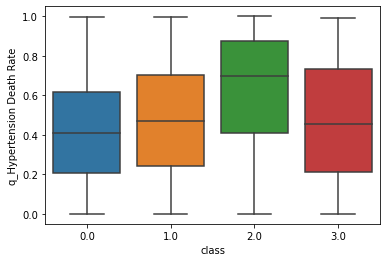

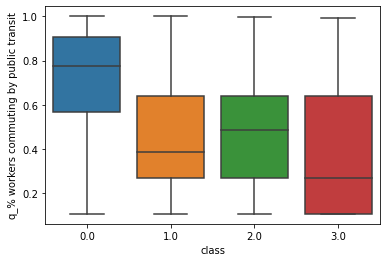

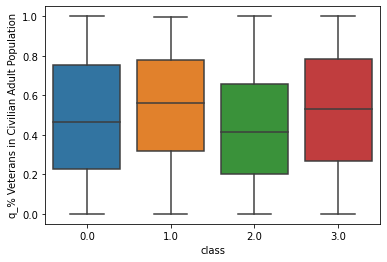

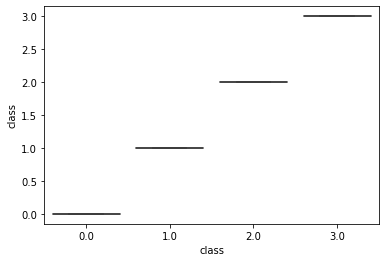

In [113]:
for i in X_red.columns:
    try:
        plt.figure(frameon=True,)
        sns.boxplot(x='class',y=X_red[i],data=X_red)
#         plt.savefig(str(i)+".png")
    except:
        pass

# Elbow method for number of clusters


Cluster 2 Inertia 7028.134949512999
Cluster 3 Inertia 6299.51899537467
Cluster 4 Inertia 5649.140046954855
Cluster 5 Inertia 5493.660905329463
Cluster 6 Inertia 5363.528987581314
Cluster 7 Inertia 5239.701702754953
Cluster 8 Inertia 5138.46286596506
Cluster 9 Inertia 5051.01693412089
Cluster 10 Inertia 4978.061154438495
Cluster 11 Inertia 4906.5052844095435
Cluster 12 Inertia 4843.214709820872
Cluster 13 Inertia 4771.834262297297
Cluster 14 Inertia 4730.879570915896


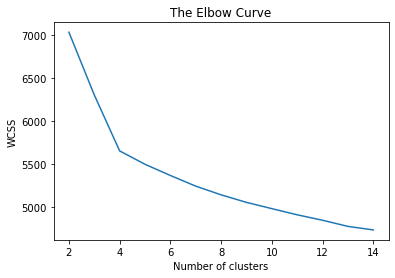

In [114]:
wcss = []  #Within-Cluster-Sum-of-Squares

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_red)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,15),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

Cluster 1 Inertia 9884.856787470202
Cluster 2 Inertia 7028.134949512999
Cluster 3 Inertia 6299.51899537467
Cluster 4 Inertia 5649.140046954855
Cluster 5 Inertia 5493.660905329463
Cluster 6 Inertia 5363.528987581314
Cluster 7 Inertia 5239.701702754953
Cluster 8 Inertia 5138.462865965059
Cluster 9 Inertia 5051.01693412089
Cluster 10 Inertia 4978.061154438495
Cluster 11 Inertia 4906.5052844095435


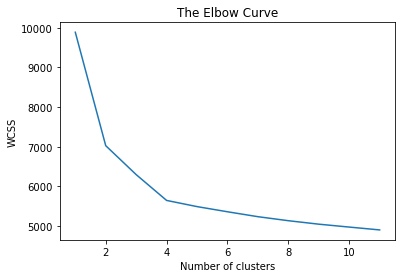

In [115]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_red)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

In [ ]:
# 4 cluster seems a good choice

kmeans=  KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )

In [ ]:
kmeans.fit(X)


In [ ]:
y_pred=kmeans.predict(X)
y_pred

# Silhoutte Score

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [116]:
X=X_red

In [117]:
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clu = []
km_ss = []

start=2
end=30
# Create a for loop to find optimal n_clusters
for n_clusters in range(2,10):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X)

    silhouette_avg = round(silhouette_score(X, labels, random_state=1), 3)

    # Append score to lists
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

    # Plot graph at the end of loop
    if n_clusters == end - 1:
        plt.figure(figsize=(12,4))

        plt.title('Silhouette Score')
        plt.xlabel("Number of clusters")
        sns.pointplot(x=n_clu, y=km_ss)
        plt.tight_layout()
        plt.show()

No. Clusters: 2, Silhouette Score: 0.247, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.178, Change from Previous Cluster: -0.069
No. Clusters: 4, Silhouette Score: 0.163, Change from Previous Cluster: -0.015
No. Clusters: 5, Silhouette Score: 0.135, Change from Previous Cluster: -0.028
No. Clusters: 6, Silhouette Score: 0.123, Change from Previous Cluster: -0.012
No. Clusters: 7, Silhouette Score: 0.108, Change from Previous Cluster: -0.015
No. Clusters: 8, Silhouette Score: 0.098, Change from Previous Cluster: -0.01
No. Clusters: 9, Silhouette Score: 0.082, Change from Previous Cluster: -0.016


# Davies_bouldin_score

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

### 4 or 6 seems good choice 

In [118]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score=davies_bouldin_score(X, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 1.5499960137945272
Cluster 3 Davis Score 1.7289336145398997
Cluster 4 Davis Score 2.0143454093958124
Cluster 5 Davis Score 2.4430728559296346
Cluster 6 Davis Score 2.6913301383078014
Cluster 7 Davis Score 2.8363371111684677
Cluster 8 Davis Score 3.042192565276773
Cluster 9 Davis Score 2.959069278526033


# Calinski-Harabasz Index

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

The score is higher when clusters are dense and well separated.


In [119]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score=metrics.calinski_harabasz_score(X, labels)
    print("Cluster", i, "Calinski index", score)

Cluster 2 Calinski index 1272.6557100705384
Cluster 3 Calinski index 890.7114414210572
Cluster 4 Calinski index 782.0398367958544
Cluster 5 Calinski index 625.0686453004013
Cluster 6 Calinski index 527.1973755707481
Cluster 7 Calinski index 461.8823620940472
Cluster 8 Calinski index 412.3657041193487
Cluster 9 Calinski index 373.70978702953806
